In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import gensim
import pickle
import random
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/StrawHats projects/News scraping.csv')
data

,Category,Sub_Category,Language,Date,Time,Title,Synopsis,News,Author/Publisher,Source Link
0,Sports,Badminton,English,"January 27, 2021",4:51:08 pm,BWF World Tour Finals: Fighting PV Sindhu lose...,This was PV Sindhu's 16th defeat to Tai Tzu Yi...,World champion shuttler P V Sindhu went down f...,Pti,https://indianexpress.com/article/sports/badmi...
1,Sports,Badminton,English,"January 27, 2021",8:30:22 am,"World Tour Finals Preview: PV Sindhu, recharge...",With the Indian having played more matches tha...,Carolina Marin (50 total) played 24 tournament...,Shivani naik,https://indianexpress.com/article/sports/badmi...
2,Sports,Badminton,English,"January 24, 2021",7:03:06 pm,Satwiksairaj’s offence gets neutralised by sav...,Satwiksairaj Rankireddy uses big smash to kill...,One would have to be blind to not figure that ...,Shivani naik,https://indianexpress.com/article/sports/badmi...
3,Sports,Badminton,English,"January 23, 2021",7:58:44 pm,Dream run of Indian doubles pairs end with sem...,"Up against the world number three Thai pair, S...",The Indian mixed doubles pair of Satwiksairaj ...,Pti,https://indianexpress.com/article/sports/badmi...
4,Sports,Badminton,English,"January 23, 2021",8:42:32 pm,Satwik-Chirag’s impressive run ends with semif...,The Indian pair had participated in Super 1000...,Tokyo Olympics medal contender Satwiksairaj Ra...,Pti,https://indianexpress.com/article/sports/badmi...
...,...,...,...,...,...,...,...,...,...,...
5918,Entertainment,Box-office-collection,English,"March 29, 2019",1:19:53 pm,Kesari box office collection Day 8: Akshay Kum...,Kesari box office collection Day 8: Akshay Kum...,"Kesari, starring Akshay Kumar in the lead role...",Entertainment desk,https://indianexpress.com/article/entertainmen...
5919,Entertainment,Box-office-collection,English,"March 29, 2019",8:12:26 am,Junglee box office prediction: Vidyut Jammwal ...,Junglee box office prediction: Junglee will ha...,Vidyut Jammwal’s Junglee has caught the fancy ...,Arushi jain,https://indianexpress.com/article/entertainmen...
5920,Entertainment,Box-office-collection,English,"March 28, 2019",10:47:46 am,Luka Chuppi box office collection Day 26: Kart...,Luka Chuppi box office collection Day 26: Krit...,Kriti Sanon and Kartik Aaryan’s film Luka Chup...,Entertainment desk,https://indianexpress.com/article/entertainmen...
5921,Entertainment,Box-office-collection,English,"March 28, 2019",9:14:42 am,Badla box office collection day 20: Going gets...,Badla box office collection day 20: Taapsee Pa...,"After more than 2 weeks, Taapsee Pannu’s film ...",Entertainment desk,https://indianexpress.com/article/entertainmen...


In [ ]:


# avg. reading speed (200 wpm)
speed=200
import statistics



In [ ]:
l1=[]
for i in range(len(data)):
    length1 = (len(data.News[i])/200)*0.1
    l1.append(length1)
time_array1=np.asarray(l1)
mean_time1=np.mean(time_array1)
print(mean_time1)
std_dev1=np.std(time_array1)
print(std_dev1)

1.4864495188249198
0.8405208119599761


In [ ]:
l2=[]
for i in range(len(data)):
    length2 = (len(data.News[i])/200)*0.5
    l2.append(length2)
time_array2=np.asarray(l2)
mean_time2=np.mean(time_array2)
print(mean_time2)
std_dev2=np.std(time_array2)
print(std_dev2)

7.4322475941246005
4.20260405979988


In [ ]:
l3=[]
for i in range(len(data)):
    length3 = (len(data.News[i])/200)
    l3.append(length3)
time_array3=np.asarray(l3)
mean_time3=np.mean(time_array3)
print(mean_time3)
std_dev3=np.std(time_array3)
print(std_dev3)

14.864495188249201
8.40520811959976


In [ ]:
import scipy.stats
mycomps = (scipy.stats.norm(mean_time1, std_dev1),scipy.stats.norm(mean_time2, std_dev2),scipy.stats.norm(mean_time3, std_dev3))
priors = [0.3,0.4,0.3]

In [ ]:
def myMixture(x,priors,myComponents):
    s = 0
    for comp,prior in zip(myComponents,priors):
        s += comp.pdf(x)*prior
    return s

In [ ]:
import numpy as np
x_data = np.linspace(0.0,20,1000)

In [ ]:
y_data = myMixture(x_data,priors,mycomps)

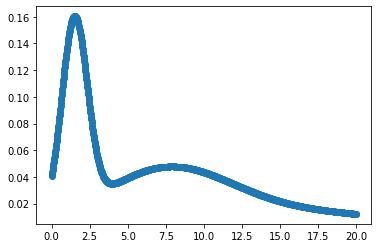

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_data,y_data)

In [ ]:
def LLE(data,priors,myComponents):
    probs = myMixture(data,priors,myComponents)
    lle = sum(np.log(probs))
    return lle

In [ ]:
data = [0.5,0.8,1,5,6,9]
print(myMixture(data,priors,mycomps))
LLE(data,priors,mycomps)

[0.08456073 0.11645324 0.13585706 0.03929    0.04399378 0.04658152]


-16.043746586904238

In [ ]:
data = [1,3,1,3,7,7]
print(myMixture(data,priors,mycomps))
LLE(data,priors,mycomps)

[0.13585706 0.05517328 0.13585706 0.05517328 0.04696192 0.04696192]


-15.903693550188834

In [ ]:
data = np.random.rand(100000)*20

(array([10005., 10085., 10021., 10138., 10026.,  9912.,  9977.,  9864.,
         9919., 10053.]),
 array([4.01484764e-04, 2.00035683e+00, 4.00031217e+00, 6.00026752e+00,
        8.00022286e+00, 1.00001782e+01, 1.20001335e+01, 1.40000889e+01,
        1.60000442e+01, 1.79999996e+01, 1.99999549e+01]),
 <a list of 10 Patch objects>)

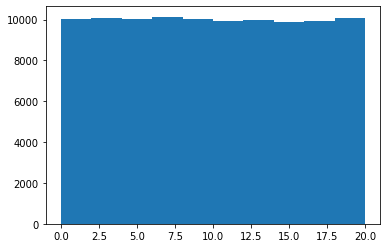

In [ ]:
plt.hist(data)

In [ ]:
LLE(data,priors,mycomps)/data.shape

array([-3.33412246])

In [ ]:
def genSample(sample_size,priors,myComponents):
    myData = np.empty( shape=(0) )
    for comp,prior in zip(myComponents,priors):
        new_data = comp.rvs(int(sample_size*prior))
        myData = np.append(myData,new_data)
    return myData

In [ ]:
tdata = genSample(10,priors,mycomps)
LLE(data,priors,mycomps)/data.shape
tdata[tdata<0]=0

In [ ]:
print(tdata)

[ 1.47426578  1.7648611   0.63500373  0.          7.15196863  8.80666253
 11.00516424 10.90922923 17.25082648 16.75450607]


(array([10005., 10085., 10021., 10138., 10026.,  9912.,  9977.,  9864.,
         9919., 10053.]),
 array([4.01484764e-04, 2.00035683e+00, 4.00031217e+00, 6.00026752e+00,
        8.00022286e+00, 1.00001782e+01, 1.20001335e+01, 1.40000889e+01,
        1.60000442e+01, 1.79999996e+01, 1.99999549e+01]),
 <a list of 10 Patch objects>)

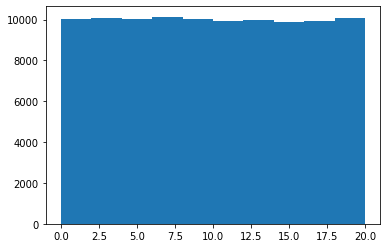

In [ ]:
plt.hist(data)

In [ ]:
#Gen time spent
time=[]
for i in range(150):
    time.append(tdata)
time_sp=np.array(time).ravel()
time_sp.shape

(1500,)

In [ ]:
click_stream=np.random.binomial(1,0.7,1500)

In [ ]:
time_spent=click_stream*time_sp    
time_spent.shape[0]

1500

In [ ]:
def click_stream(num , num_user):
  time=[]
  for i in range(num*num_user):
    time.append(tdata)
  time_sp=np.array(time).ravel()
  shape = time_sp.shape[0]
  click_stream=np.random.binomial(1,0.7,shape)
  time_spent=click_stream*time_sp 
  usr_id_ls = []
  for i in range(1, (num_user)+1):
    i = str(i)
    shape = int(shape)
    num_user = int(num_user)
    usr_id = 'usr_id'+ i
    n = shape/(num_user)
    n = int(n)
    usr_id= np.empty(n)
    usr_id.fill(i)
    usr_id_ls.append(usr_id)
  return shape , click_stream, time_spent ,usr_id_ls,n

click_stream_data = click_stream(150 , 100)
click_stream = click_stream_data[1]
time_spent = click_stream_data[2]
user = click_stream_data[3]
usr_id = list(itertools.chain.from_iterable(user))
print(click_stream_data[0])


150000


In [ ]:
#Generating UserID
usr_id1=np.empty(500)
usr_id1.fill(1)
usr_id2=np.empty(500)
usr_id2.fill(2)
usr_id3=np.empty(500)
usr_id3.fill(3)
usr_id = np.concatenate((usr_id1,usr_id2,usr_id3))

In [ ]:
data['cat'] = pd.factorize(data['Category'])[0]
data

,Category,Sub_Category,Language,Date,Time,Title,Synopsis,News,Author/Publisher,Source Link,cat
0,Sports,Badminton,English,"January 27, 2021",4:51:08 pm,BWF World Tour Finals: Fighting PV Sindhu lose...,This was PV Sindhu's 16th defeat to Tai Tzu Yi...,World champion shuttler P V Sindhu went down f...,Pti,https://indianexpress.com/article/sports/badmi...,0
1,Sports,Badminton,English,"January 27, 2021",8:30:22 am,"World Tour Finals Preview: PV Sindhu, recharge...",With the Indian having played more matches tha...,Carolina Marin (50 total) played 24 tournament...,Shivani naik,https://indianexpress.com/article/sports/badmi...,0
2,Sports,Badminton,English,"January 24, 2021",7:03:06 pm,Satwiksairaj’s offence gets neutralised by sav...,Satwiksairaj Rankireddy uses big smash to kill...,One would have to be blind to not figure that ...,Shivani naik,https://indianexpress.com/article/sports/badmi...,0
3,Sports,Badminton,English,"January 23, 2021",7:58:44 pm,Dream run of Indian doubles pairs end with sem...,"Up against the world number three Thai pair, S...",The Indian mixed doubles pair of Satwiksairaj ...,Pti,https://indianexpress.com/article/sports/badmi...,0
4,Sports,Badminton,English,"January 23, 2021",8:42:32 pm,Satwik-Chirag’s impressive run ends with semif...,The Indian pair had participated in Super 1000...,Tokyo Olympics medal contender Satwiksairaj Ra...,Pti,https://indianexpress.com/article/sports/badmi...,0
...,...,...,...,...,...,...,...,...,...,...,...
5918,Entertainment,Box-office-collection,English,"March 29, 2019",1:19:53 pm,Kesari box office collection Day 8: Akshay Kum...,Kesari box office collection Day 8: Akshay Kum...,"Kesari, starring Akshay Kumar in the lead role...",Entertainment desk,https://indianexpress.com/article/entertainmen...,3
5919,Entertainment,Box-office-collection,English,"March 29, 2019",8:12:26 am,Junglee box office prediction: Vidyut Jammwal ...,Junglee box office prediction: Junglee will ha...,Vidyut Jammwal’s Junglee has caught the fancy ...,Arushi jain,https://indianexpress.com/article/entertainmen...,3
5920,Entertainment,Box-office-collection,English,"March 28, 2019",10:47:46 am,Luka Chuppi box office collection Day 26: Kart...,Luka Chuppi box office collection Day 26: Krit...,Kriti Sanon and Kartik Aaryan’s film Luka Chup...,Entertainment desk,https://indianexpress.com/article/entertainmen...,3
5921,Entertainment,Box-office-collection,English,"March 28, 2019",9:14:42 am,Badla box office collection day 20: Going gets...,Badla box office collection day 20: Taapsee Pa...,"After more than 2 weeks, Taapsee Pannu’s film ...",Entertainment desk,https://indianexpress.com/article/entertainmen...,3


In [ ]:
def factorizer(data):
  uci = list(data['cat'].unique())
  L=[]
  for i in range(len(uci)):
      L.append(data.groupby(['cat']).get_group(uci[i]))
  for i in L:
    i['sub_cat'] , f = pd.factorize(i['Sub_Category'])
  for i in range(len(L)):
    L[i]['luffy'] = L[i]['cat'].astype(str) + '.' + L[i]['sub_cat'].astype(str)
  return L

L = factorizer(data)
L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[     Category   Sub_Category Language  ... cat sub_cat luffy
 0      Sports      Badminton  English  ...   0       0   0.0
 1      Sports      Badminton  English  ...   0       0   0.0
 2      Sports      Badminton  English  ...   0       0   0.0
 3      Sports      Badminton  English  ...   0       0   0.0
 4      Sports      Badminton  English  ...   0       0   0.0
 ...       ...            ...      ...  ...  ..     ...   ...
 2368   Sports  Wwe-wrestling  English  ...   0       6   0.6
 2369   Sports  Wwe-wrestling  English  ...   0       6   0.6
 2370   Sports  Wwe-wrestling  English  ...   0       6   0.6
 2371   Sports  Wwe-wrestling  English  ...   0       6   0.6
 2372   Sports  Wwe-wrestling  English  ...   0       6   0.6
 
 [2373 rows x 13 columns],
       Category Sub_Category Language  ... cat sub_cat luffy
 2373  Business     Aviation  English  ...   1       0   1.0
 2374  Business     Aviation  English  ...   1       0   1.0
 2375  Business     Aviation  English  ...  

In [ ]:
def rand_num_cat(cat):
  a , f = pd.factorize(cat)
  l = []
  for i in f:
    k = i + 1
    l.append(k) 
  random_num = random.choice(l)
  return random_num

def ls_cat(rand_num , cat):
  a , f = pd.factorize(cat)
  l = []
  for i in range(0 , rand_num):
    rand_sec = random.choice(f)
    l.append(rand_sec)
  return list(set(l))


def served_cat(num_selection):
  num = rand_num_cat(data['cat'])
  section = ls_cat(num, data['cat'])
  l = []
  for g in section:
    random_sub_cat = rand_num_cat(L[g]['sub_cat'])
    ls_sub_cat = ls_cat(random_sub_cat , L[g]['sub_cat'])
    for i in ls_sub_cat:
      luffy = str(g) + '.' + str(i)
      luffy = float(luffy)
      l.append(luffy)

  C = []

  for i in range (0 , num_selection):
      c = random.choice(l)
      C.append(c)
  return C , ('section', section)

cat_served = served_cat(1500)[0]
len(cat_served)

served_sec = []
for n in range(0 , 100):
  s = served_cat(1500)[0]
  served_sec.append(s)

sec = served_sec
served_sec = list(itertools.chain.from_iterable(sec))
len(served_sec)
print(len(time_spent))
print(len(usr_id))
print(len(click_stream))



150000
150000
150000


In [ ]:
d={"Click":click_stream,"UserID":usr_id,"Time_Spent":time_spent ,"served_section" : served_sec}

In [ ]:
dtaframe=pd.DataFrame(d)

In [ ]:
dtaframe['served_section'] = dtaframe['served_section'].astype('str')
dtaframe[['Catagory', 'Sub_Catagory']] = dtaframe.served_section.str.split(".",expand=True)
dtaframe['Catagory'] = dtaframe['Catagory'].astype('int')
dtaframe['Sub_Catagory'] = dtaframe['Sub_Catagory'].astype('int')
dtaframe['served_section'] = dtaframe['served_section'].astype('float')
dtaframe.to_csv('/content/gdrive/MyDrive/StrawHats projects/StrawHats_clickstream.csv')

You can see the csv file in final ipynb notebook

In [ ]:
while True:pass